# Panoramica Nazioni

Panoramica dati delle nazioni.

> Max Pierini

***

Le venti nazioni con maggior numero di casi totali.

In [1]:
import json
import requests
import datetime as dt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from IPython.display import HTML

In [2]:
T = pd.read_csv(
    "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/csv/COVID-Confirmed.csv",
    index_col=["Country/Region"]
).sort_index()
R = pd.read_csv(
    "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/csv/COVID-Recovered.csv",
    index_col=["Country/Region"]
).sort_index()
D = pd.read_csv(
    "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/csv/COVID-Deaths.csv",
    index_col=["Country/Region"]
).sort_index()

In [3]:
T.drop(['Province/State', "Lat", 'Long'], 1, inplace=True)
R.drop(['Province/State', "Lat", 'Long'], 1, inplace=True)
D.drop(['Province/State', "Lat", 'Long'], 1, inplace=True)

In [4]:
days = pd.to_datetime(T.columns.values, infer_datetime_format=True)

In [5]:
countries = T.index.get_level_values('Country/Region').unique().sort_values()

In [6]:
_ = """print(f"FIRST ENTRY DATE: {days[0]}")

print(f"LAST  ENTRY DATE: {days[-1]}")

period = (days[-1] - days[0]).days

print("COVERAGE: {} days".format(period))
print("CURRENT DATE IS: {}".format(dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))"""

In [7]:
sortedT = T.sort_values(by=T.columns[-1], axis=0, ascending=False)
best_countries = sortedT.index[0:20].values
print("COUNTRIES: {}".format(best_countries))

COUNTRIES: ['US' 'India' 'Brazil' 'Russia' 'Argentina' 'Spain' 'Colombia' 'France'
 'Peru' 'Mexico' 'United Kingdom' 'South Africa' 'Iran' 'Chile' 'Iraq'
 'Italy' 'Bangladesh' 'Germany' 'Indonesia' 'Philippines']


In [8]:
P = T - D - R

In [9]:
r = D / T
k = R / T

In [10]:
minC = 20
minD = 20
minR = 20
minP = 20

***

# CASES

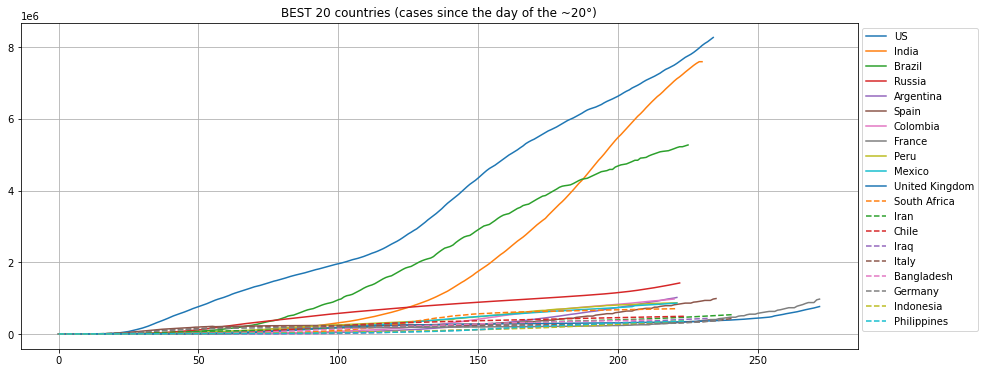

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    try:
        j = (T.loc[country] > minC).values.nonzero()[0][0]
    except Exception as err:
        print("ERROR: {} max={} < min={}".format(country, max(TOTyC[country]), minC))
        continue
    Y = T.loc[country][j:]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = [i for i in range(Y.index.size)]
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"BEST 20 countries (cases since the day of the ~{minC:.0f}°)")
fig.set_facecolor('w'); plt.show();

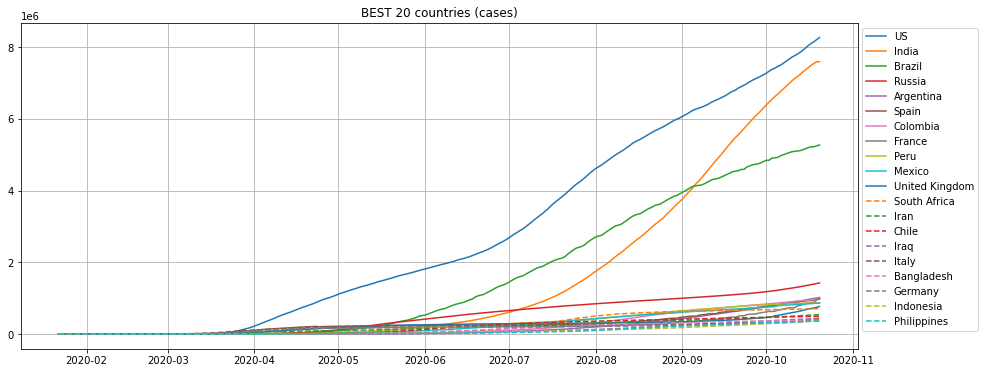

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    Y = T.loc[country]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"BEST 20 countries (cases)")
fig.set_facecolor('w'); plt.show();

<hr>

# DEATHS

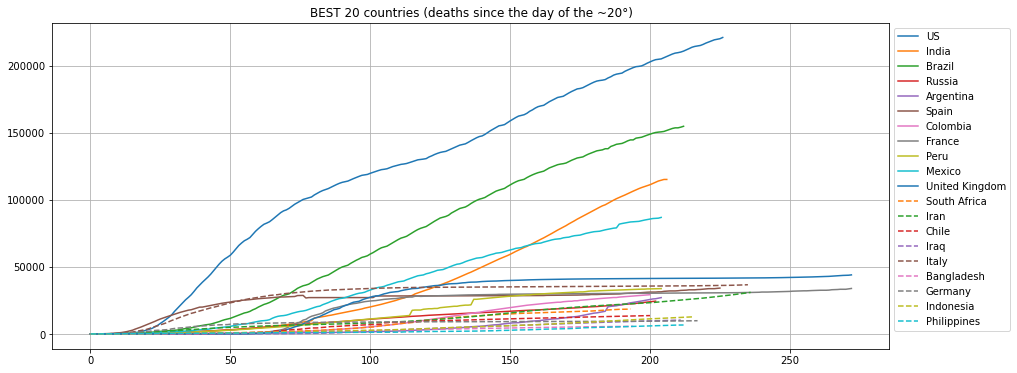

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    try:
        j = (D.loc[country] > minD).values.nonzero()[0][0]
    except Exception as err:
        print("ERROR: {} max={} < min={}".format(country, max(TOTyC[country]), minC))
        continue
    Y = D.loc[country][j:]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = [i for i in range(Y.index.size)]
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"BEST 20 countries (deaths since the day of the ~{minC:.0f}°)")
fig.set_facecolor('w'); plt.show();

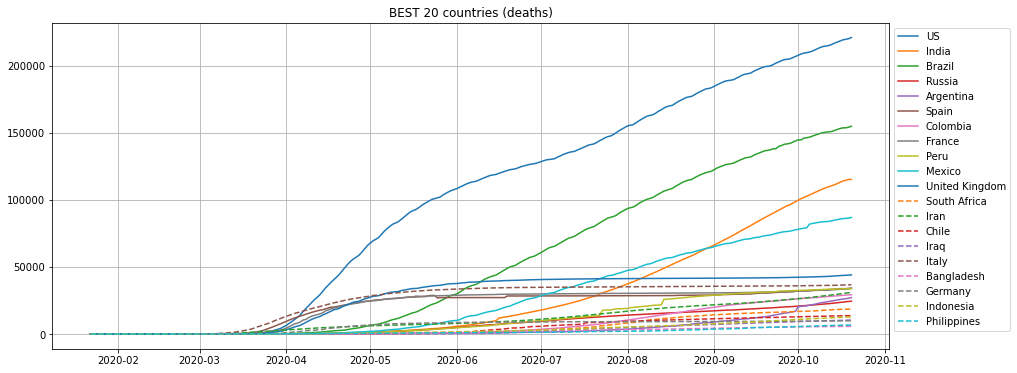

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    Y = D.loc[country]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"BEST 20 countries (deaths)")
fig.set_facecolor('w'); plt.show();

<hr>

# RECOVERED

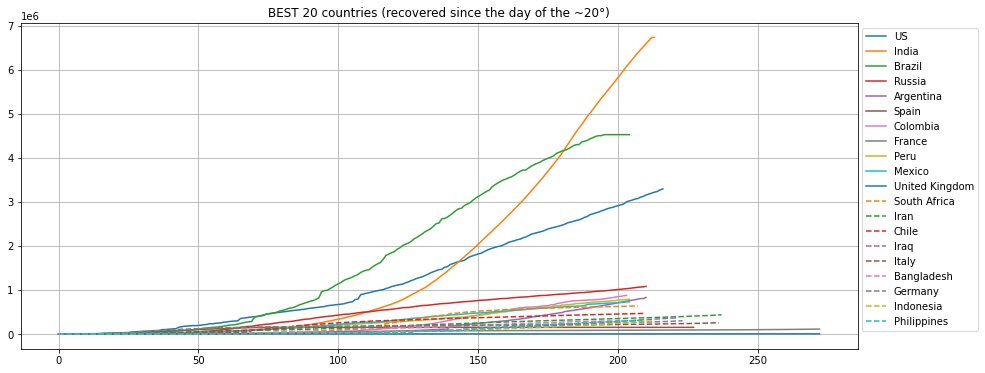

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    try:
        j = (R.loc[country] > minR).values.nonzero()[0][0]
    except Exception as err:
        print("ERROR: {} max={} < min={}".format(country, max(TOTyC[country]), minC))
        continue
    Y = R.loc[country][j:]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = [i for i in range(Y.index.size)]
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"BEST 20 countries (recovered since the day of the ~{minC:.0f}°)")
fig.set_facecolor('w'); plt.show();

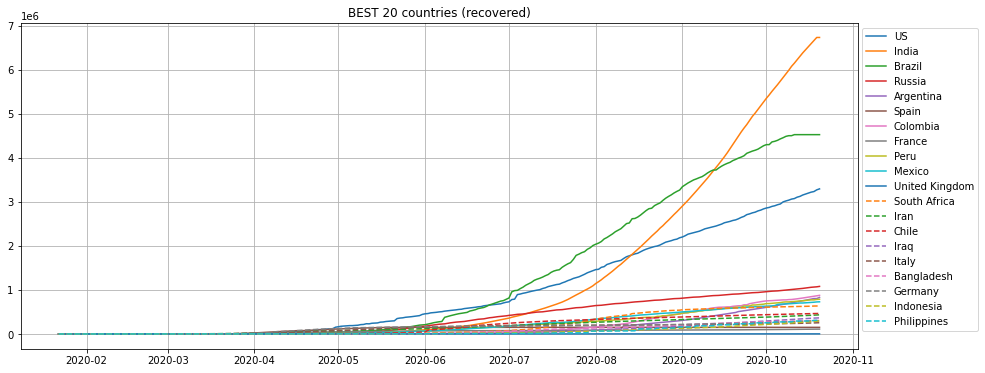

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    Y = R.loc[country]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"BEST 20 countries (recovered)")
fig.set_facecolor('w'); plt.show();

<hr>

# INFECTED

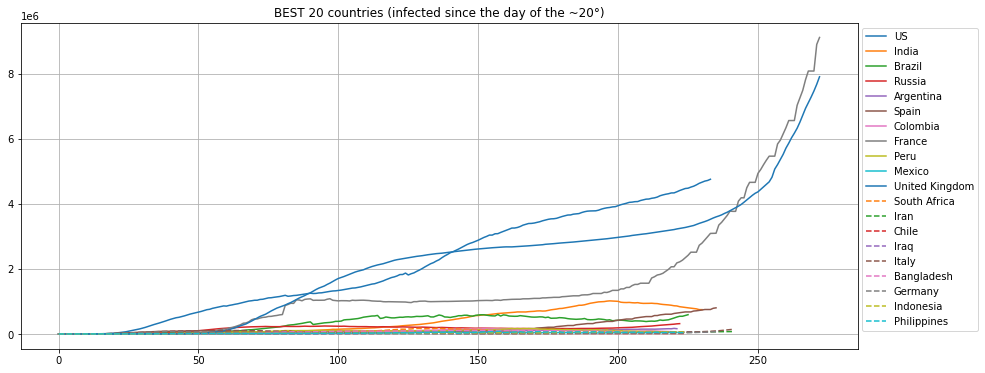

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    try:
        j = (P.loc[country] > minP).values.nonzero()[0][0]
    except Exception as err:
        print("ERROR: {} max={} < min={}".format(country, max(TOTyC[country]), minC))
        continue
    Y = P.loc[country][j:]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = [i for i in range(Y.index.size)]
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"BEST 20 countries (infected since the day of the ~{minC:.0f}°)")
fig.set_facecolor('w'); plt.show();

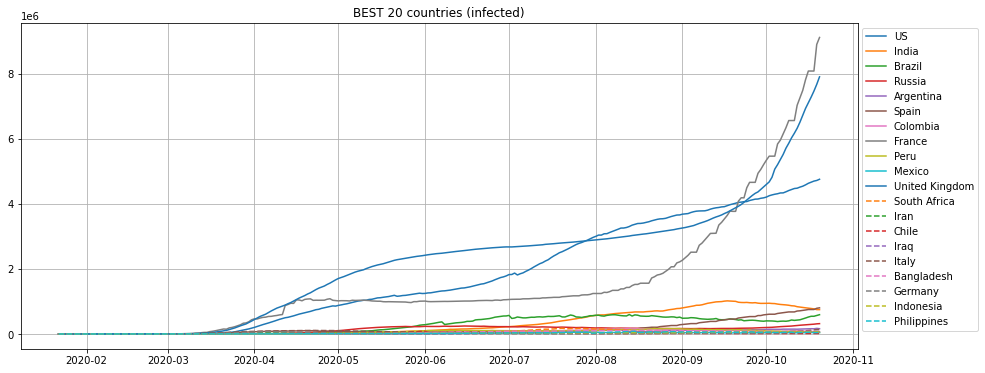

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    Y = P.loc[country]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"BEST 20 countries (infected)")
fig.set_facecolor('w'); plt.show();

<hr>

# CFR (Cases Fatality Rate)

!!! PLEASE NOTE !!!

These rates are only useful for **SIRD** epidemiological model ([read here for details](https://maxpierini.it/R0.pdf)) not to define COVID-19 actual rates.

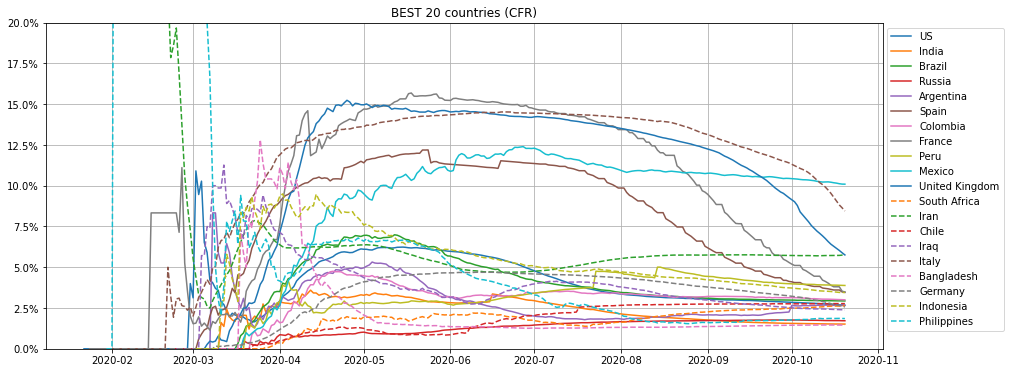

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    den = T.loc[country]
    if isinstance(den, pd.DataFrame):
        den = den.sum(axis=0)
    num = D.loc[country]
    if isinstance(num, pd.DataFrame):
        num = num.sum(axis=0)
    Y = num / den
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
ax.set_ylim(0, .2)
plt.grid()
ax.set_title(f"BEST 20 countries (CFR)")
fig.set_facecolor('w'); plt.show();

# RECOVERY RATE

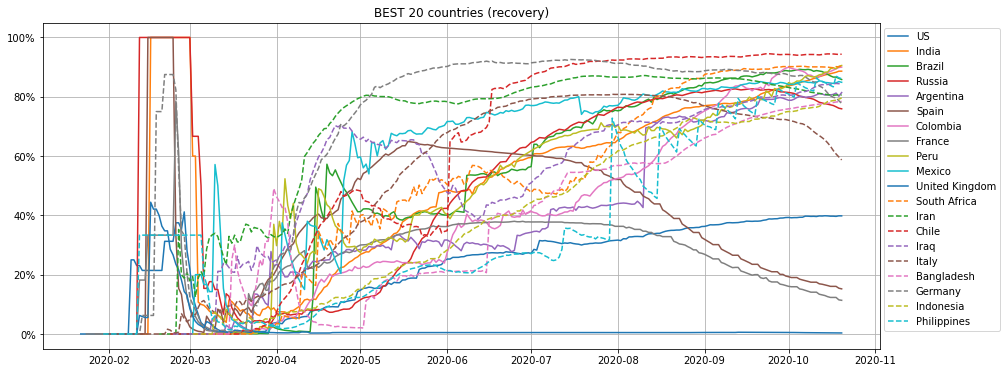

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, country in enumerate(best_countries):
    den = T.loc[country]
    if isinstance(den, pd.DataFrame):
        den = den.sum(axis=0)
    num = R.loc[country]
    if isinstance(num, pd.DataFrame):
        num = num.sum(axis=0)
    Y = num / den
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=country, ls=ls
    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
#ax.set_ylim(0, .2)
plt.grid()
ax.set_title(f"BEST 20 countries (recovery)")
fig.set_facecolor('w'); plt.show();